In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv('new_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219765 entries, 0 to 219764
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            219765 non-null  int64  
 1   type            219765 non-null  object 
 2   amount          219765 non-null  float64
 3   nameOrig        219765 non-null  object 
 4   oldbalanceOrg   219765 non-null  float64
 5   newbalanceOrig  219764 non-null  float64
 6   nameDest        219764 non-null  object 
 7   oldbalanceDest  219764 non-null  float64
 8   newbalanceDest  219764 non-null  float64
 9   isFraud         219764 non-null  float64
 10  isFlaggedFraud  219764 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.4+ MB


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,219765.000000,2.197650e+05,2.197650e+05,2.197640e+05,2.197640e+05,2.197640e+05,219764.000000,219764.0
mean,10.330407,1.808084e+05,8.825071e+05,9.003847e+05,9.497383e+05,1.189618e+06,0.000705,0.0
std,2.192156,3.254299e+05,2.794303e+06,2.831588e+06,2.369067e+06,2.633400e+06,0.026548,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.229706e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.083043e+04,1.952100e+04,0.000000e+00,5.525830e+04,1.464908e+05,0.000000,0.0
75%,12.000000,2.306170e+05,1.932596e+05,2.294439e+05,7.889001e+05,1.195410e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [11]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='amount'>

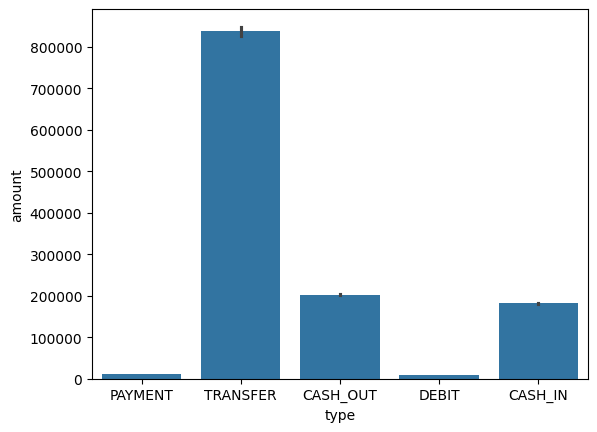

In [12]:
sns.barplot(x='type', y='amount', data=data)

In [13]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,219609
1.0,155


/tmp/ipython-input-2319969707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

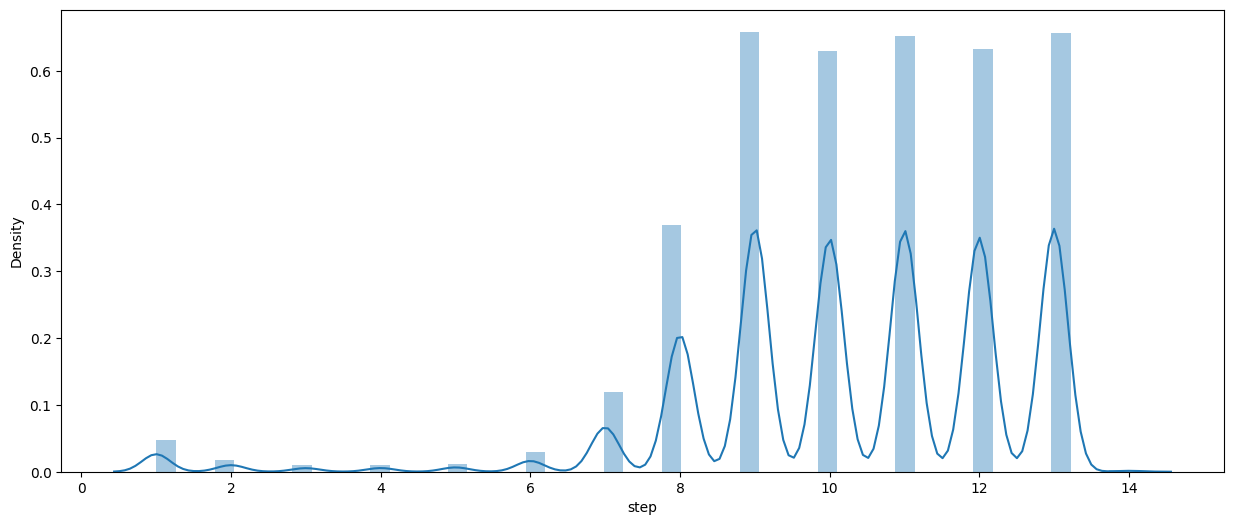

In [14]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<Axes: >

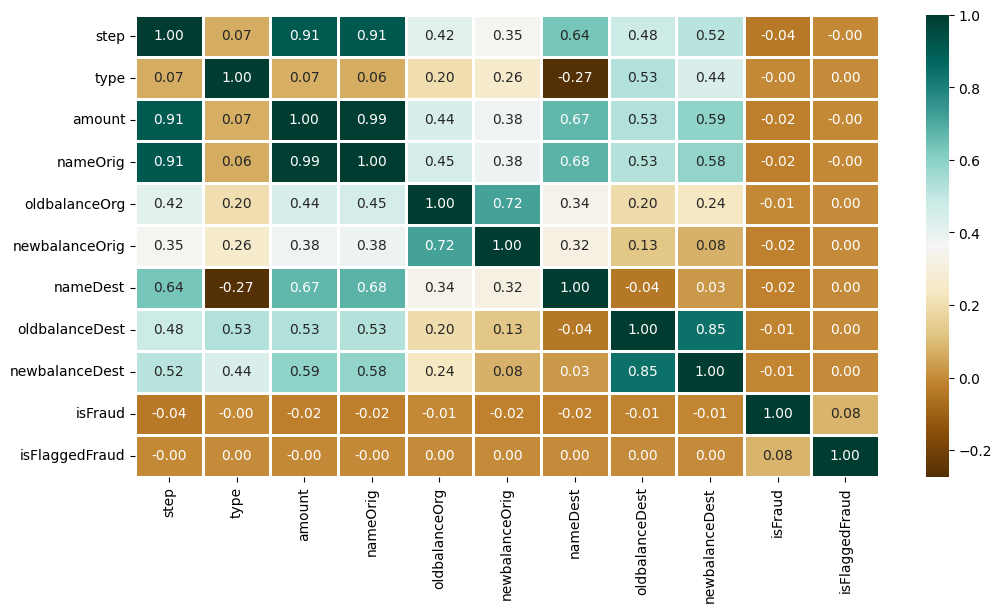

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('new_data.csv')

# Encode 'type' column
type_new = pd.get_dummies(data['type'], drop_first=True)

# Merge back with the original data
data_new = pd.concat([data, type_new], axis=1)

# Show the first rows
print(data_new.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0      0.0             0.0   
1  M2044282225             0.0             0.0      0.0             0.0   
2   C553264065             0.0             0.0      1.0             0.0   
3    C38997010         21182.0             0.0      1.0             0.0   
4  M1230701703             0.0             0.0      0.0             0.0   

   CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0     False  False     True     False  
1     False  False

In [17]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [18]:
X.shape, y.shape

((219765, 11), (219765,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras
import numpy as np

# Remove NaN labels
mask_train = ~np.isnan(y_train)
X_train = X_train[mask_train]
y_train = y_train[mask_train]

mask_test = ~np.isnan(y_test)
X_test = X_test[mask_test]
y_test = y_test[mask_test]

# Handle NaN in features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Models
models = [
    LogisticRegression(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model} : ')

    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9217029556157051
Validation Accuracy :  0.8941186797104725

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9817359511181314

RandomForestClassifier(criterion='entropy', n_estimators=7, r

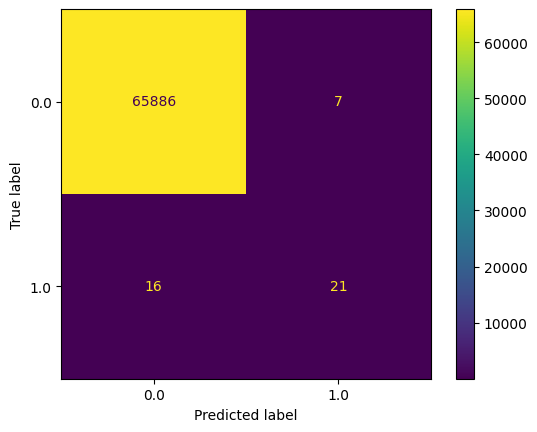

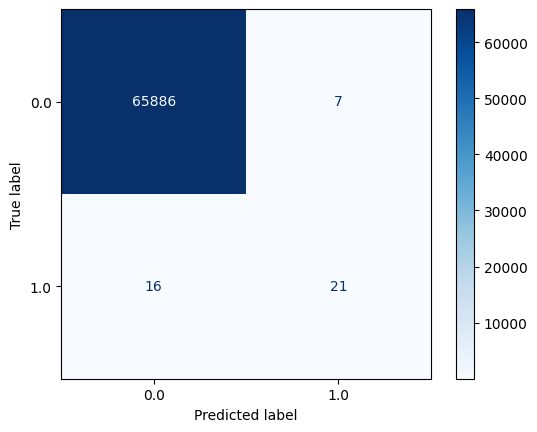

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()